In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("loan_data.csv", low_memory=False)

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 100 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   loan_amnt                                            466285 non-null  int64  
 1   funded_amnt                                          466285 non-null  int64  
 2   funded_amnt_inv                                      466285 non-null  float64
 3   term                                                 466285 non-null  object 
 4   int_rate                                             466285 non-null  float64
 5   installment                                          466285 non-null  float64
 6   emp_length                                           466285 non-null  float64
 7   annual_inc                                           466285 non-null  float64
 8   dti                                                  

In [6]:
df.shape

(466285, 74)

In [7]:
df.shape[0]

466285

In [8]:
df['loan_status'].nunique()

9

In [9]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [10]:
df['loan_status'].isnull().sum()

0

## About the dataset

1. The dataset contains 466285 records with 74 features
2. 'loan_status' is target variable which has zero null values and has 9 distinct values, number of records are not same for each category
3. This is an imbalanced dataset

## Next steps for analysis
1. Check for columns which have unique values like ids, description and remove them
2. Check for columns which have 100% missing values and remove them
3. Check the columns which have partially missing values (0-99%) and impute/remove them accordingly
4. Check for categorical variables and no.of unique values (categories) in it
5. Perform Label encoding or one hot encoding where applicable
6. for categorical features with high number of unique values, check on grouping them in to smaller number of buckets
7. Perform Standardization or Normalization
8. Load the data to the model

In [11]:
df['desc'].nunique()

124436

In [12]:
df['desc'].isnull().sum()

340302

In [13]:
columns = ['desc', 'url', 'id', 'member_id']

In [14]:
for i in columns:
    if (df[i].nunique()+df[i].isnull().sum() == df.shape[0] ):
        df = df.drop([i],axis=1)
        print("Removed ", i," column")
    else:
        continue

Removed  url  column
Removed  id  column
Removed  member_id  column


In [15]:
df.shape

(466285, 71)

In [16]:
df['desc'].nunique()+df['desc'].isnull().sum()

464738

## For 'desc' column only 2k values are repeating else are unique and this column can be removed

In [17]:
df = df.drop(['desc'],axis=1)

In [18]:
df.shape

(466285, 70)

In [19]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

## will be removed this line 15.071469
#next_pymnt_d, mths_since_last_delinq, desc, mths_since_last_major_derog, mths_since_last_record

In [23]:
def checkmissing_values(x):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True)
    return missing_value_df.tail(x)

In [25]:
checkmissing_values(30)

,column_name,percent_missing
last_credit_pull_d,last_credit_pull_d,0.009007
collections_12_mths_ex_med,collections_12_mths_ex_med,0.031097
revol_util,revol_util,0.072917
last_pymnt_d,last_pymnt_d,0.080637
emp_length,emp_length,4.505399
emp_title,emp_title,5.916553
tot_coll_amt,tot_coll_amt,15.071469
total_rev_hi_lim,total_rev_hi_lim,15.071469
tot_cur_bal,tot_cur_bal,15.071469
next_pymnt_d,next_pymnt_d,48.728567


In [31]:
missing_value_df.loc[missing_value_df['percent_missing']==  100.0]

,column_name,percent_missing


In [28]:
df = df.dropna(axis=1, how='all')

In [29]:
df.shape

(466285, 53)

In [98]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

In [99]:
missing_value_df.loc[missing_value_df['percent_missing'] > 0]

,column_name,percent_missing
title,title,0.004289
earliest_cr_line,earliest_cr_line,0.006219
last_credit_pull_d,last_credit_pull_d,0.009007
last_pymnt_d,last_pymnt_d,0.080637
emp_length,emp_length,4.505399
emp_title,emp_title,5.916339


In [274]:
df['tot_cur_bal'].value_counts()

0.0         78
23254.0     15
14186.0     15
30491.0     14
28674.0     14
            ..
330961.0     1
47865.0      1
32032.0      1
375034.0     1
294305.0     1
Name: tot_cur_bal, Length: 220690, dtype: int64

<AxesSubplot:xlabel='tot_cur_bal', ylabel='Count'>

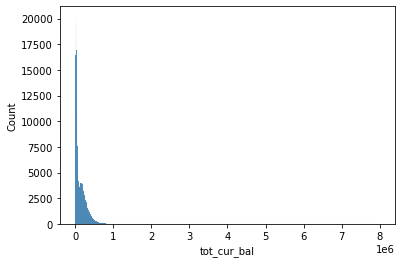

In [277]:
sns.histplot(df['tot_cur_bal'])

<AxesSubplot:xlabel='tot_coll_amt', ylabel='Count'>

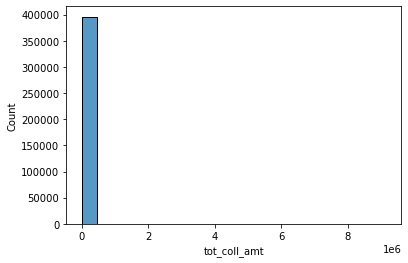

In [278]:
sns.histplot(df['tot_coll_amt'])

<AxesSubplot:xlabel='total_rev_hi_lim', ylabel='loan_status'>

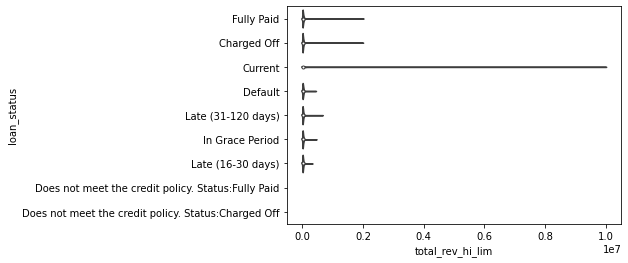

In [285]:

sns.violinplot(x=df['total_rev_hi_lim'], y=df['loan_status'])

## Check the dependecny of missing values with the target variables

In [33]:
df[df.next_pymnt_d.isnull()].groupby([ 'loan_status']).agg({'loan_status': ['count']})

,loan_status
,count
loan_status,
Charged Off,42475
Fully Paid,184739


next payment date can be null for the customers who have already paid or charged off from loan
1. Imputing the nan values with zero

In [34]:
df['next_pymnt_d'].fillna(value = 0,inplace = True)

In [35]:
df['next_pymnt_d'].isnull().sum()

0

In [36]:
df[df.mths_since_last_delinq.isnull()].groupby([ 'loan_status']).agg({'loan_status': ['count']})

,loan_status
,count
loan_status,
Charged Off,23655
Current,115388
Default,426
Does not meet the credit policy. Status:Charged Off,295
Does not meet the credit policy. Status:Fully Paid,904
Fully Paid,104404
In Grace Period,1435
Late (16-30 days),536


## remove columns >50% missing 

In [39]:
df =df.drop(['mths_since_last_record','mths_since_last_major_derog','mths_since_last_delinq'],axis=1)

In [40]:
checkmissing_values(10)

,column_name,percent_missing
total_acc,total_acc,0.006219
last_credit_pull_d,last_credit_pull_d,0.009007
collections_12_mths_ex_med,collections_12_mths_ex_med,0.031097
revol_util,revol_util,0.072917
last_pymnt_d,last_pymnt_d,0.080637
emp_length,emp_length,4.505399
emp_title,emp_title,5.916553
tot_cur_bal,tot_cur_bal,15.071469
tot_coll_amt,tot_coll_amt,15.071469
total_rev_hi_lim,total_rev_hi_lim,15.071469


In [46]:
df.shape

(466285, 50)

In [37]:
df[df.mths_since_last_major_derog.isnull()].groupby([ 'loan_status']).agg({'loan_status': ['count']})

,loan_status
,count
loan_status,
Charged Off,34522
Current,168671
Default,618
Does not meet the credit policy. Status:Charged Off,761
Does not meet the credit policy. Status:Fully Paid,1988
Fully Paid,152674
In Grace Period,2271
Late (16-30 days),844


<AxesSubplot:xlabel='loan_status', ylabel='mths_since_last_major_derog'>

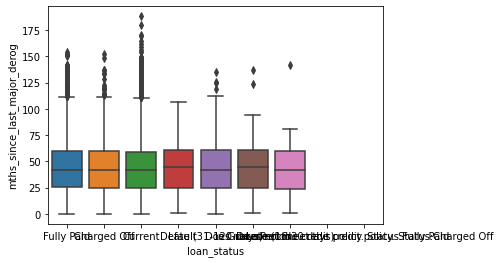

In [196]:
sns.boxplot(y=df['mths_since_last_major_derog'],x=df['loan_status'])

<AxesSubplot:ylabel='mths_since_last_major_derog'>

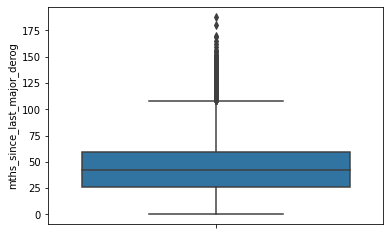

In [197]:
sns.boxplot(y=df['mths_since_last_major_derog'])

## mths_since_last_delinq, mths_since_last_major_derog, mths_since_last_record
## need to check for this Plot box plots

<AxesSubplot:xlabel='mths_since_last_major_derog', ylabel='Count'>

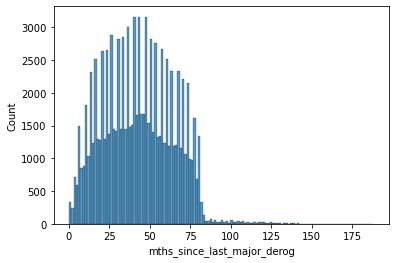

In [201]:
sns.histplot(df['mths_since_last_major_derog'])

In [202]:
missing_value_df.loc[missing_value_df['percent_missing'] > 1]

,column_name,percent_missing
emp_length,emp_length,4.505399
emp_title,emp_title,5.916553
tot_cur_bal,tot_cur_bal,15.071469
tot_coll_amt,tot_coll_amt,15.071469
total_rev_hi_lim,total_rev_hi_lim,15.071469
mths_since_last_delinq,mths_since_last_delinq,53.690554
mths_since_last_major_derog,mths_since_last_major_derog,78.773926
mths_since_last_record,mths_since_last_record,86.566585


<AxesSubplot:xlabel='loan_status', ylabel='tot_coll_amt'>

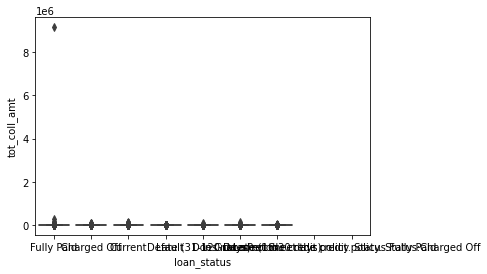

In [210]:
sns.boxplot(y= df['tot_coll_amt'], x= df['loan_status'])

## remove columns >50% missing 

In [49]:
df =df.drop(['mths_since_last_record','mths_since_last_major_derog','mths_since_last_delinq'],axis=1)

KeyError: "['mths_since_last_record' 'mths_since_last_major_derog'\n 'mths_since_last_delinq'] not found in axis"

In [50]:
checkmissing_values(10)

,column_name,percent_missing
total_acc,total_acc,0.006219
last_credit_pull_d,last_credit_pull_d,0.009007
collections_12_mths_ex_med,collections_12_mths_ex_med,0.031097
revol_util,revol_util,0.072917
last_pymnt_d,last_pymnt_d,0.080637
emp_length,emp_length,4.505399
emp_title,emp_title,5.916553
tot_cur_bal,tot_cur_bal,15.071469
tot_coll_amt,tot_coll_amt,15.071469
total_rev_hi_lim,total_rev_hi_lim,15.071469


<AxesSubplot:xlabel='tot_cur_bal', ylabel='Count'>

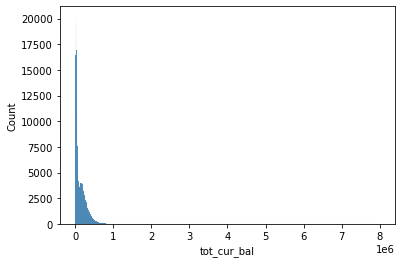

In [57]:
sns.histplot(df['tot_cur_bal'])

<AxesSubplot:ylabel='tot_cur_bal'>

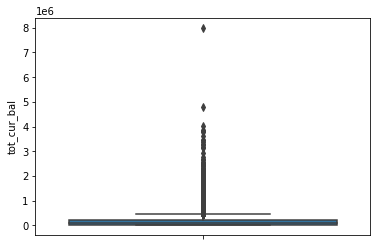

In [60]:
sns.boxplot(y=df['tot_cur_bal'])

## 'tot_cur_bal' is right skewed and has outliers
imputing the nan values with median for tot_coll_amt, total_rev_hi_lim as well

In [61]:
imputemedian = ['tot_cur_bal','total_rev_hi_lim','tot_coll_amt']

In [62]:
for column in imputemedian:
    df[column].fillna(df[column].median(),inplace = True)
    print("imputed medain for", column)

imputed medain for tot_cur_bal
imputed medain for total_rev_hi_lim
imputed medain for tot_coll_amt


In [65]:
checkmissing_values(20)

,column_name,percent_missing
issue_d,issue_d,0.000000
home_ownership,home_ownership,0.000000
pymnt_plan,pymnt_plan,0.000000
purpose,purpose,0.000000
loan_status,loan_status,0.000000
annual_inc,annual_inc,0.000858
title,title,0.004289
delinq_2yrs,delinq_2yrs,0.006219
acc_now_delinq,acc_now_delinq,0.006219
earliest_cr_line,earliest_cr_line,0.006219


<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

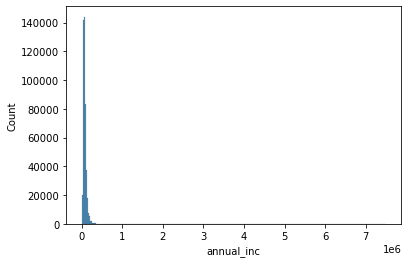

In [73]:
sns.histplot(df['annual_inc'], bins =300)

## Used median as distribution is right skewed 

In [75]:
df['annual_inc'].fillna(df['annual_inc'].median(),inplace = True)

In [105]:
df['title'].fillna(df['title'].mode()[0],inplace = True)

In [106]:
df['title'].fillna(df['title'].mode()[0],inplace = True)

In [78]:
df['delinq_2yrs'].fillna(df['delinq_2yrs'].median(),inplace = True)

In [80]:
df['acc_now_delinq'].fillna(df['acc_now_delinq'].median(),inplace = True)

In [107]:
df['earliest_cr_line'].fillna(df['earliest_cr_line'].mode()[0],inplace = True)

In [84]:
df['inq_last_6mths'].fillna(df['inq_last_6mths'].median(),inplace = True)

In [87]:
df['pub_rec'].fillna(df['pub_rec'].median(),inplace = True)

In [86]:
df['total_acc'].fillna(df['total_acc'].median(),inplace = True)

In [88]:
df['open_acc'].fillna(df['open_acc'].median(),inplace = True)

In [108]:
df['last_credit_pull_d'].fillna(df['last_credit_pull_d'].mode()[0],inplace = True)

In [90]:
df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].median(),inplace = True)

In [91]:
df['revol_util'].fillna(df['revol_util'].median(),inplace = True)

In [109]:
df['emp_length'].fillna(df['emp_length'].mode()[0],inplace = True)

In [110]:
df['emp_title'].fillna(df['emp_title'].mode()[0],inplace = True)

In [111]:
checkmissing_values(10)

,column_name,percent_missing
pymnt_plan,pymnt_plan,0.000000
purpose,purpose,0.000000
title,title,0.000000
zip_code,zip_code,0.000000
addr_state,addr_state,0.000000
dti,dti,0.000000
delinq_2yrs,delinq_2yrs,0.000000
annual_inc,annual_inc,0.000000
total_rev_hi_lim,total_rev_hi_lim,0.000000
last_pymnt_d,last_pymnt_d,0.080637


In [104]:
df['emp_title'].isnull().sum()

27587

In [112]:
df['last_pymnt_d'].fillna(df['last_pymnt_d'].mode()[0],inplace = True)

In [113]:
checkmissing_values(10)

,column_name,percent_missing
pymnt_plan,pymnt_plan,0.0
purpose,purpose,0.0
title,title,0.0
zip_code,zip_code,0.0
addr_state,addr_state,0.0
dti,dti,0.0
delinq_2yrs,delinq_2yrs,0.0
earliest_cr_line,earliest_cr_line,0.0
verification_status,verification_status,0.0
total_rev_hi_lim,total_rev_hi_lim,0.0


In [114]:
df.shape

(466285, 50)

## Removed/Replaced null values in the dataset
1. No null values in the datasets
2. Check on categorical variables or object data type features

In [116]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,0,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,0,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,0,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,0,Jan-15,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


In [118]:
df['term'].value_counts()

 36 months    337953
 60 months    128332
Name: term, dtype: int64

In [119]:
df['term'] = df['term'].str.split(' ', expand=True)[1]

In [120]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,0,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,0,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,0,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,0,Jan-15,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


In [121]:
df['emp_length'].value_counts()

10+ years    171057
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64

In [122]:
## Label encoding the values with integers for "emp_length" feature

In [123]:
df['emp_length']=df['emp_length'].map({'< 1 year':0.5,'1 year':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10,})


In [124]:
df['emp_length'].value_counts()

10.0    171057
2.0      41373
3.0      36596
0.5      36265
5.0      30774
1.0      29622
4.0      28023
7.0      26180
6.0      26112
8.0      22395
9.0      17888
Name: emp_length, dtype: int64

In [125]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36,10.65,162.87,B,B2,Teacher,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,0,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,0,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,Teacher,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,0,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,0,Jan-15,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


df = df.drop(['issue_d','title', 'zip_code','earliest_cr_line', 'earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d'],axis=1)

## As sub grade has the details of grade column included we can drop grade columns

In [145]:
# Remove row with ANY value in home_ownership

In [394]:
df['application_type']=df['application_type'].map({'INDIVIDUAL':1})


sub_grade, emp_title, issue_d, title, zip_code, addr_state, earliest_cr_line, initial_list_status, last_pymnt_d, next_pymnt_d, last_credit_pull_d

sub_grade, emp_title, issue_d, title, zip_code, addr_state, earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d

## As sub grade has the details of grade column included we can drop grade columns

In [126]:
df.sub_grade.value_counts()

B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64

## Grouping categories with sub grades less than 10K like E1,E2 to 'E', F1,F2 to "F"

In [128]:
df['sub_grade_new'] = df['sub_grade'].map({'E1':"E",'E2':"E",'E3':"E",'E4':"E",'E5':"E",
                                           'F1':"F",'F2':"F",'F3':"F",'F4':"F",'F5':"F",
                                           'G1':"G",'G2':"G",'G3':"G",'G4':"G",'G5':"G",
                                           'A1':"A1",'A2':"A2",'A3':"A3",'A4':"A4",'A5':"A5",
                                           'B1':"B1",'B2':"B2",'B3':"B3",'B4':"B4",'B5':"B5",
                                           'C1':'C1', 'C2':'C2','C3':'C3','C4':'C4','C5':'C5',
                                            'D1':'D1', 'D2':'D2','D3':'D3','D4':'D4','D5':'D5',
                                          })

In [129]:
df['sub_grade_new'].value_counts()

E     35757
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
F     13229
A3    12568
D5    11566
A2    10956
A1    10541
G      3322
Name: sub_grade_new, dtype: int64

In [130]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,sub_grade_new
0,5000,5000,4975.0,36,10.65,162.87,B,B2,Teacher,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,0,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,B2
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,0,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,C4
2,2400,2400,2400.0,36,15.96,84.33,C,C5,Teacher,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,0,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,C5
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,0,Jan-15,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,C1
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,B5


In [140]:
df=df.drop('grade',axis=1)

In [141]:
columns = df.select_dtypes(include=['object']).columns
print(columns)

Index(['term', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'pymnt_plan', 'purpose', 'addr_state',
       'initial_list_status', 'application_type', 'sub_grade_new'],
      dtype='object')


In [132]:
df['emp_title'].nunique()

205475

In [142]:
for i in columns:
    print(i, df[i].nunique())

term 2
sub_grade 35
home_ownership 6
verification_status 3
loan_status 9
pymnt_plan 2
purpose 14
addr_state 50
initial_list_status 2
application_type 1
sub_grade_new 23


## Removing categorical features with more than 50 unique values

In [344]:
df.shape

(466285, 47)

In [134]:
df = df.drop(['emp_title','issue_d','title', 'zip_code','earliest_cr_line', 'earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d'],axis=1)

In [160]:
columns = df.select_dtypes(include=['object']).columns
print(columns)

Index(['term', 'home_ownership', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status',
       'application_type', 'sub_grade_new', 'new_state'],
      dtype='object')


In [348]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,new_state,sub_grade_new
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,Fully Paid,n,credit_card,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,AZ,B2
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,Charged Off,n,car,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,GA,C4
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,Fully Paid,n,small_business,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,IL,C5
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,Fully Paid,n,other,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,CA,C1
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,Current,n,other,OR,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,others,B5


In [161]:
for i in columns:
    print(i, df[i].nunique())

term 2
home_ownership 6
verification_status 3
loan_status 9
pymnt_plan 2
purpose 14
addr_state 50
initial_list_status 2
application_type 1
sub_grade_new 23
new_state 17


In [144]:
## Removing sub grade as we have sub_grade_new


In [145]:
df=df.drop('sub_grade',axis=1)

In [159]:
for i in columns:
    print(i, df[i].nunique())

term 2
home_ownership 6
verification_status 3
loan_status 9
pymnt_plan 2
purpose 14
addr_state 50
initial_list_status 2
application_type 1
sub_grade_new 23


In [153]:
dftest= df.groupby('addr_state').agg({'addr_state':'size'})

In [154]:
df123=dftest.query('addr_state<10000')

In [155]:
abc = list(df123.index)

In [156]:
df['new_state'] = df['addr_state'].apply(lambda x: 'others' if x in abc else x)

In [157]:
df['new_state'].nunique()

17

In [158]:
df['addr_state'].nunique()

50

In [164]:
## Drop addr_state columns
df= df.drop('addr_state',axis =1)

In [165]:
df.shape

(466285, 41)

In [166]:
df['purpose'].value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

In [175]:
xyz= ['car','medical','moving','vacation','wedding','house','educational','renewable_energy']

In [178]:
df['purpose_new'] = df['purpose'].apply(lambda x: 'Personal Purpose' if x in xyz else x)

In [179]:
df['purpose_new'].value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
Personal Purpose       20865
major_purchase          9828
small_business          7013
Name: purpose_new, dtype: int64

In [180]:
df= df.drop('purpose',axis=1)

In [187]:
columnsencoding = ['purpose_new',  'initial_list_status', 'application_type', 'new_state',
       'sub_grade_new']

In [190]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,MORTGAGE,NONE,OTHER,OWN,RENT,Source Verified,Verified,y,credit_card,debt_consolidation,home_improvement,major_purchase,other,small_business,w,CA,FL,GA,IL,MA,MD,MI,NC,NJ,NY,OH,PA,TX,VA,WA,others,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E,F,G
0,5000,5000,4975.0,36,10.65,162.87,10.0,24000.0,Fully Paid,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1,0.0,0.0,81539.0,22800.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,60,15.27,59.83,0.5,30000.0,Charged Off,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1,0.0,0.0,81539.0,22800.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,36,15.96,84.33,10.0,12252.0,Fully Paid,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1,0.0,0.0,81539.0,22800.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,10000,10000,10000.0,36,13.49,339.31,10.0,49200.0,Fully Paid,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1,0.0,0.0,81539.0,22800.0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,3000,3000,3000.0,60,12.69,67.79,1.0,80000.0,Current,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1,0.0,0.0,81539.0,22800.0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [188]:
for i in columnsencoding:
    df_i=pd.get_dummies(df[i],drop_first=True)
    df=pd.concat([df,df_i],axis=1)
    df.head()
    df.drop(i,axis=1,inplace=True)

In [ ]:
df_grade=pd.get_dummies(df['grade'],drop_first=True)
df=pd.concat([df,df_grade],axis=1)
df.head()
df.drop('grade',axis=1,inplace=True)

In [191]:
df.shape

(466285, 86)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 86 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  int32  
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   emp_length                  466285 non-null  float64
 7   annual_inc                  466285 non-null  float64
 8   loan_status                 466285 non-null  object 
 9   dti                         466285 non-null  float64
 10  delinq_2yrs                 466285 non-null  float64
 11  inq_last_6mths              466285 non-null  float64
 12  open_acc                    466285 non-null  float64
 13  pub_rec       

In [195]:
columnsunit = df.select_dtypes(include=['uint8']).columns
print(columns)

Index(['MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT', 'Source Verified',
       'Verified', 'y', 'credit_card', 'debt_consolidation',
       'home_improvement', 'major_purchase', 'other', 'small_business', 'w',
       'CA', 'FL', 'GA', 'IL', 'MA', 'MD', 'MI', 'NC', 'NJ', 'NY', 'OH', 'PA',
       'TX', 'VA', 'WA', 'others', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3',
       'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
       'E', 'F', 'G'],
      dtype='object')


In [196]:
columnsunit[1]

'NONE'

In [199]:
df.term = df.term.astype(int)

In [ ]:
df

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 86 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  int32  
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   emp_length                  466285 non-null  float64
 7   annual_inc                  466285 non-null  float64
 8   loan_status                 466285 non-null  object 
 9   dti                         466285 non-null  float64
 10  delinq_2yrs                 466285 non-null  float64
 11  inq_last_6mths              466285 non-null  float64
 12  open_acc                    466285 non-null  float64
 13  pub_rec       

In [221]:
df.to_csv("D:\\Downloads\Finaloutput.csv")

In [ ]:
df.shape

In [222]:
dfoutput = pd.read_csv("D:\\Downloads\Finaloutput.csv")

In [223]:
dfoutput.shape

(466285, 87)

In [ ]:
y= df['loan_status']

In [213]:
x= df.drop("loan_status", axis=1)

In [ ]:
x.shape

In [215]:
df.shape

(466285, 86)

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     x, y, test_size=0.35, random_state=42)

In [225]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [226]:
X_train[0]

array([ 6.85198012e-01,  6.89308366e-01,  6.86635174e-01, -6.15487469e-01,
       -4.95017094e-01,  9.39912152e-01, -1.59681613e+00,  1.52772380e+00,
       -1.59924507e+00, -3.56574756e-01,  1.77387718e-01, -1.43872995e+00,
       -3.10320129e-01, -1.11310908e-01, -1.86623755e-02, -1.38388261e+00,
        1.27482110e+00,  1.26807132e+00, -2.00381752e-01, -1.96619343e-01,
       -1.95635612e-01, -7.85710637e-02, -1.23326198e-01, -1.55765533e-01,
       -1.04414998e-01, -4.43548274e-01, -8.15652689e-02,  0.00000000e+00,
       -5.73656951e-02, -1.04802946e-02, -6.80331941e-01, -1.28954847e-01,
       -1.01335609e+00, -1.01139508e-02, -1.94826984e-02, -3.13180997e-01,
        1.21569966e+00, -6.88225450e-01,  1.33081286e+00, -4.80586773e-03,
        1.85905456e+00, -1.19361585e+00, -2.46219593e-01, -1.46003291e-01,
       -2.30376231e-01, -1.23275652e-01, -7.33242085e-01, -4.25642165e-01,
       -2.69094257e-01, -1.81840258e-01, -2.03910078e-01, -1.56369746e-01,
       -1.55047085e-01, -

In [227]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
df.drop(columns=df.columns[-39:], 
        axis=1, 
        inplace=True)

In [228]:
classifier = svm.SVC(kernel='linear')


In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [ ]:
df12.head()